In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


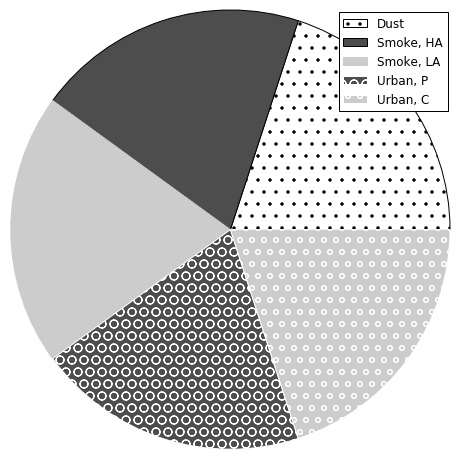

In [2]:
plt.figure(figsize=(8,8))

# The slices will be ordered and plotted counter-clockwise.
labels = ['Dust', 'Smoke, HA', 'Smoke, LA', 'Urban, P', 'Urban, C',]
sizes = [20, 20, 20, 20, 20]
colors = ['w', '0.3', '0.8', '0.3', '0.8']
edgcolors = ['r', 'r', 'r', 'r', 'r']
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
patch = plt.pie(sizes, explode=explode, colors=colors, startangle=0)[0]
# Set aspect ratio to be equal so that pie is drawn as a circle.

#hatching
patch[0].set_hatch('.')
patch[1].set_hatch('')
patch[2].set_edgecolor('0.3')
patch[2].set_hatch('')
patch[2].set_edgecolor('0.8')
patch[3].set_hatch('O')
patch[3].set_edgecolor('w')
patch[4].set_hatch('o')
patch[4].set_edgecolor('w')
plt.axis('equal')

plt.legend(patch, labels)
plt.show()


In [3]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


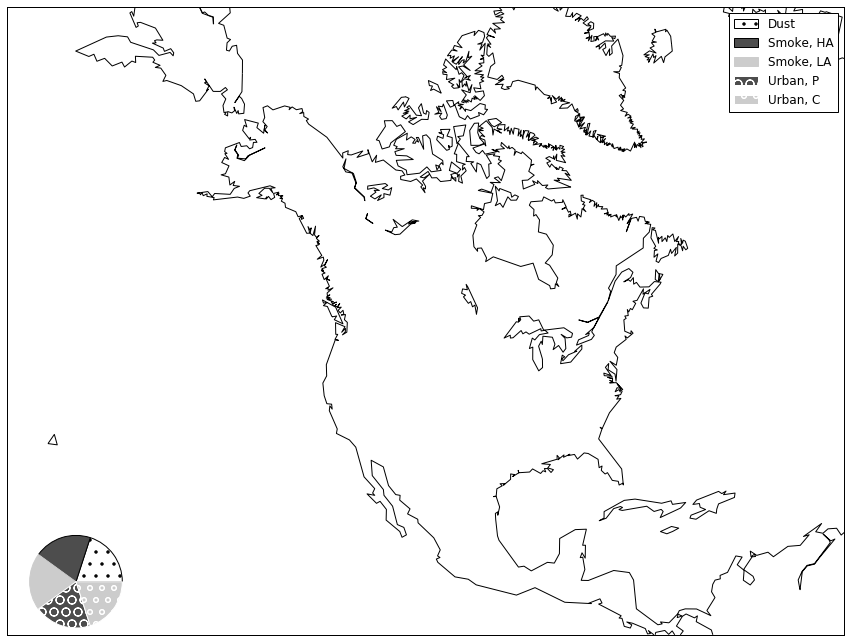

In [4]:
# setup Lambert Conformal basemap.
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.,ax=ax)

# draw coastlines.
m.drawcoastlines()


percent = '15%'
labels = ['Dust', 'Smoke, HA', 'Smoke, LA', 'Urban, P', 'Urban, C',]
sizes = [20, 20, 20, 20, 20]
colors = ['w', '0.3', '0.8', '0.3', '0.8']
axin = inset_axes(m.ax,width=percent,height=percent, loc=3)
patch =axin.pie(sizes, explode=explode, colors=colors, startangle=0)[0]

#hatching
patch[0].set_hatch('.')
patch[1].set_hatch('')
patch[2].set_edgecolor('0.3')
patch[2].set_hatch('')
patch[2].set_edgecolor('0.8')
patch[3].set_hatch('O')
patch[3].set_edgecolor('w')
patch[4].set_hatch('o')
patch[4].set_edgecolor('w')
axin.axis('equal')


ax.legend(patch, labels)


plt.show()
